In [1]:
from scipy.io import loadmat
mnist = loadmat(r"C:\Users\vedan\Desktop\datasets\mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]


In [2]:
mnist_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
mnist_label

array([0., 0., 0., ..., 9., 9., 9.])

In [4]:
mnist_data.shape

(70000, 784)

In [5]:
mnist_label.shape

(70000,)

In [6]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt


In [7]:
x=np.array(mnist_data)
y=np.array(mnist_label)

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [9]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
x.max()

255

In [11]:
x=x/255

In [12]:
x.max()

1.0

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=14)

In [14]:
x_train.shape

(56000, 784)

In [15]:
x_test.shape

(14000, 784)

In [16]:
model=Sequential([
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')#we are using softmax activation only but in a differnt way, by using softmax while evaluating cost
])

In [17]:
from tensorflow.keras import layers, models

In [18]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [19]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.6856
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2376
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1910
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1696
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1461
Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1329
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1243
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1221
Epoch 9/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1133
Epoch 10/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1065
Epoch 11/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1032
Epoch 12/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0986
Epoch 13/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0922
Epoch 14/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0896
Epoch 15/100
17

In [20]:
logits=model.predict(x_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
y_pred_probablities=tf.nn.softmax(logits).numpy()

In [22]:
y_pred_probablities.shape

(14000, 10)

In [23]:
y_pred=np.argmax(y_pred_probablities, axis=1)


In [24]:
y_pred

array([9, 0, 9, ..., 0, 9, 0], dtype=int64)

In [27]:
accuracy = np.mean(y_pred == y_test)

# To express accuracy as a percentage
accuracy_percentage = accuracy * 100

print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 95.61%


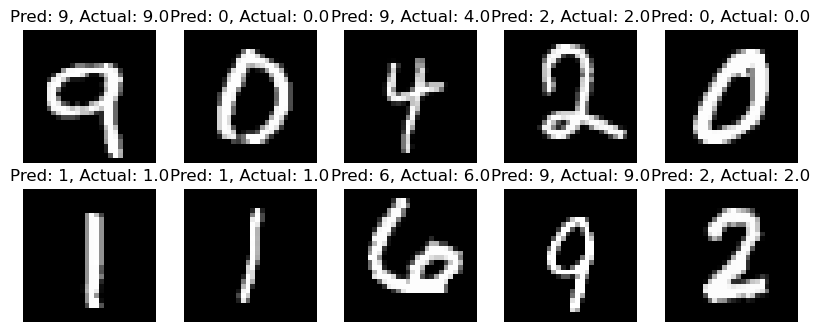

In [28]:
import matplotlib.pyplot as plt

# Function to plot images with their predicted and actual labels
def plot_images_with_predictions(x_test, y_test, y_pred, num_images=10):
    # Plot the first 'num_images' images
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape 1D image back to 28x28
        plt.title(f"Pred: {y_pred[i]}, Actual: {y_test[i]}")
        plt.axis('off')
    plt.show()

# Assuming X_test, y_test, and y_pred are already defined
plot_images_with_predictions(x_test, y_test, y_pred, num_images=10)


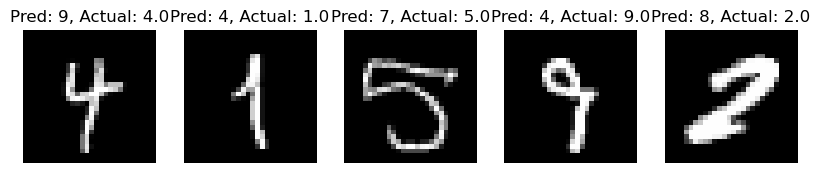

In [29]:
import matplotlib.pyplot as plt

# Function to plot incorrectly predicted images
def plot_wrong_predictions(x_test, y_test, y_pred, num_images=10):
    # Find the indices where predictions were wrong
    wrong_indices = np.where(y_pred != y_test)[0]
    
    # If there are fewer wrong predictions than requested, adjust num_images
    num_images = min(num_images, len(wrong_indices))
    
    # Plot the first 'num_images' wrong predictions
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        index = wrong_indices[i]
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_test[index].reshape(28, 28), cmap='gray')  # Reshape to 28x28
        plt.title(f"Pred: {y_pred[index]}, Actual: {y_test[index]}")
        plt.axis('off')
    plt.show()

# Assuming X_test, y_test, and y_pred are already defined
plot_wrong_predictions(x_test, y_test, y_pred, num_images=5)
